In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc 
import matplotlib.pyplot as plt 

# Description 

perform fine annotation for gene activity data and compare the result with scrna annotation

## gadata annotation

In [2]:
scdata = sc.read_h5ad(r'D:\sly_data\gadata_vis\ga_plot.h5ad')
scdata 

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 337691 × 17
    obs: 'species', 'samples', 'tissues', 'n_genes', 'leiden', 'cell_type'
    var: 'n_cells'
    obsm: 'X_umap'

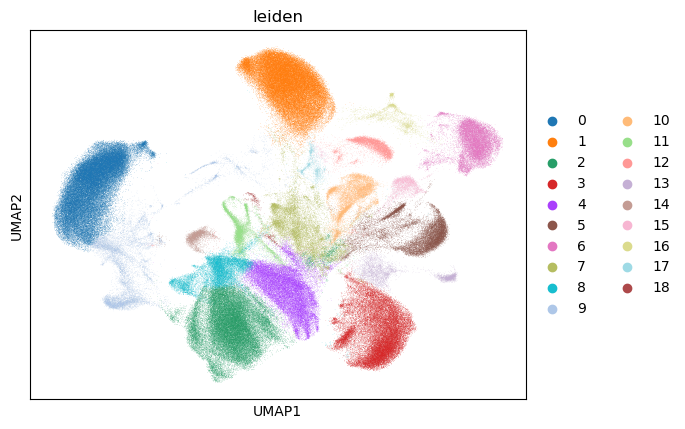

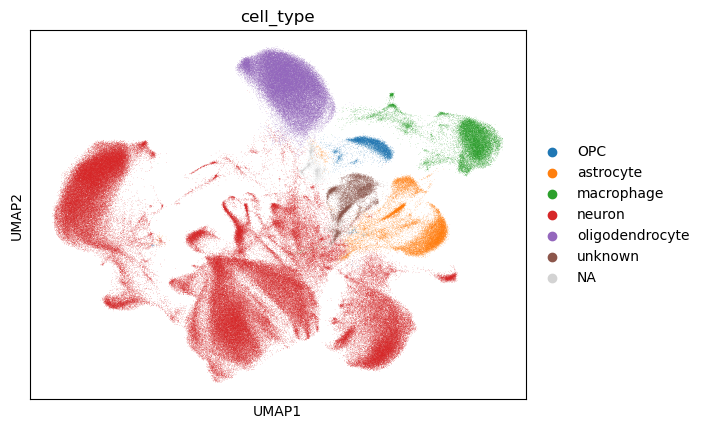

In [3]:
sc.pl.umap(scdata, color = ['leiden'])
sc.pl.umap(scdata, color = ['cell_type'])

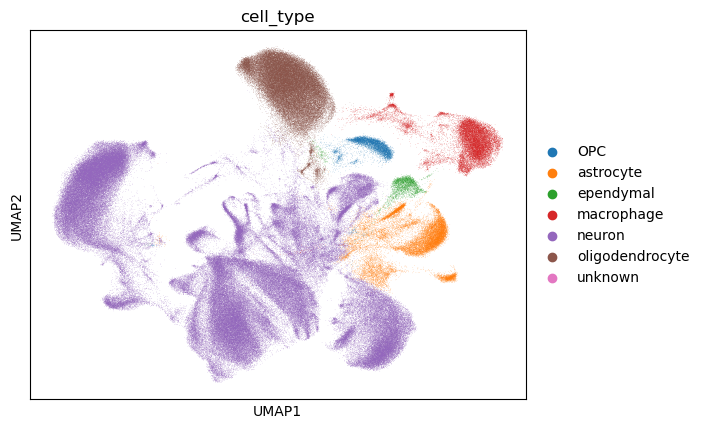

In [ ]:
cell_anno = {
    'neuron': [0, 2, 3, 4, 7, 8, 9, 10,11, 14, 18],
    'OPC': [12],
    'macrophage': [6, 16],
    'oligodendrocyte': [1,17],
    'astrocyte': [5,13],
     'ependymal': [15]
}

leiden_dic = {}
for ele in cell_anno:
    tmp = cell_anno[ele]
    for _ in tmp:
        leiden_dic[str(_)] = ele

scdata.obs.loc[:, 'cell_type'] = scdata.obs.leiden.map(leiden_dic)
sc.pl.umap(scdata, color='cell_type')

In [106]:
scdata.write('ga_plot.h5ad')

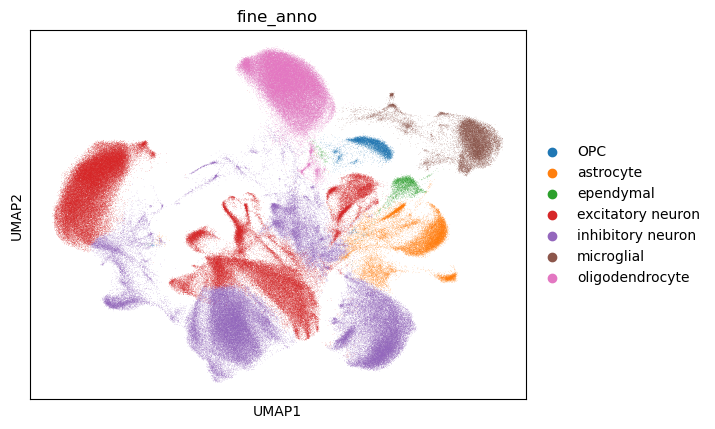

In [81]:
fine_anno = {
    'excitatory neuron': [0,4, 8,10, 11, 14, 18],
    'inhibitory neuron': [2,3,7,9],
    'OPC': [12],
    'microglial': [6, 16],
    'oligodendrocyte': [1,17],
    'astrocyte': [5,13],
     'ependymal': [15]
}

leiden_dic = {}
for ele in fine_anno:
    tmp = fine_anno[ele]
    for _ in tmp:
        leiden_dic[str(_)] = ele

scdata.obs.loc[:, 'fine_anno'] = scdata.obs.leiden.map(leiden_dic)
sc.pl.umap(scdata, color='fine_anno')

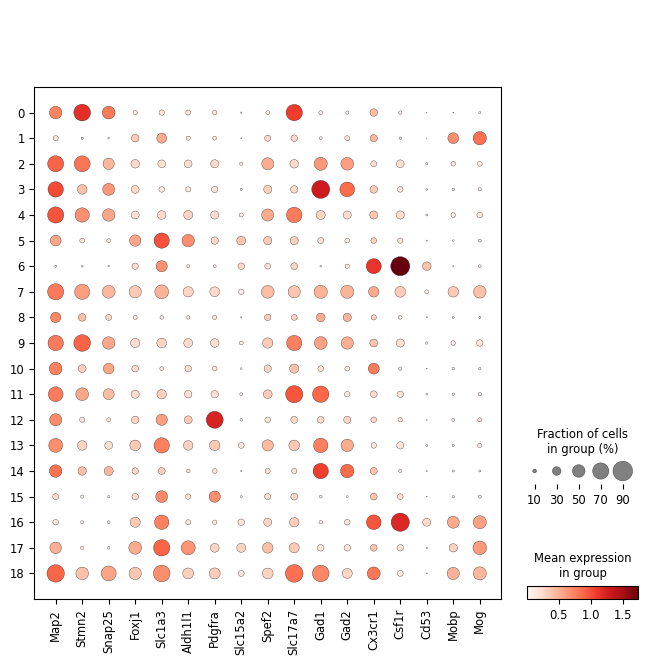

In [82]:
marker_list = ['Map2','Stmn2','Snap25','Foxj1','Slc1a3','Aldh1l1','Pdgfra','Slc15a2','Spef2','Slc17a7','Gad1', 'Gad2','Cx3cr1', 'Csf1r', 'Cd53','Mobp', 'Mog']
sc.pl.dotplot(scdata, var_names = marker_list, groupby = 'leiden')

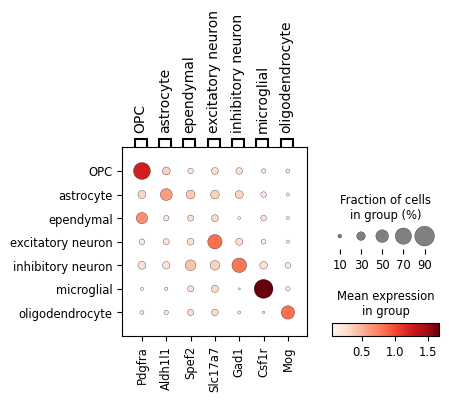

In [89]:
marker_dic = {'OPC': ['Pdgfra'],
              'astrocyte': ['Aldh1l1'],
              'ependymal': ['Spef2'],
              'excitatory neuron': ['Slc17a7'],
              'inhibitory neuron': ['Gad1'],
              'microglial': ['Csf1r'],   
              'oligodendrocyte': ['Mog'],           
}

sc.pl.dotplot(scdata, var_names = marker_dic, groupby = 'fine_anno', save = 'ga_marker.pdf')

## Compare gadata annotation with the scrna annotation 

As we performed the QC in scRNA-seq and gadata separately, the cell barcoder may be different.

However, this does not make difference to our analysis. Because we use gene activity data only to double check the annotation, we will show that the annotation based on these two data are quite similar.

In the further analysis, which requires the scRNA-seq and scATAC-seq joitly analysis, such as GRN inference, we performed a sequential ATAC-seq QC under the cell passed the scRNA-seq QC. So the multi-omic data is a high quality data passed double QC, which ensure the reliability of our results.

In [ ]:
df = pd.read_csv("anno_info.csv", index_col=0)
df


,species,tissues,samples,celltype,coarse_celltype,umap_1,umap_2,Arc,Npas4,Egr1
CYBQ-AAACAGCCAAACGGGC-1,CY,BQ,CYBQ,inhibitory neuron,inhibitory neuron,-1.231901,-0.821640,0.0,0.0,0.0
CYBQ-AAACAGCCAACTAACT-1,CY,BQ,CYBQ,excitatory neuron,excitatory neuron,-1.886236,5.347760,0.0,0.0,0.0
CYBQ-AAACAGCCACAGCCTG-1,CY,BQ,CYBQ,excitatory neuron,excitatory neuron,-0.176957,10.847816,0.0,0.0,0.0
CYBQ-AAACAGCCACCATATG-1,CY,BQ,CYBQ,inhibitory neuron,inhibitory neuron,-2.270524,-2.340782,0.0,0.0,0.0
CYBQ-AAACAGCCATCATGTG-1,CY,BQ,CYBQ,inhibitory neuron,inhibitory neuron,0.354988,0.534141,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
TYB-TTTGTGTTCTAGCGTG-1,T,YB,TYB,excitatory neuron,excitatory neuron,-4.866367,5.572216,0.0,0.0,0.0
TYB-TTTGTTGGTACTTAGG-1,T,YB,TYB,inhibitory neuron,inhibitory neuron,3.003865,5.054359,0.0,0.0,0.0
TYB-TTTGTTGGTTGTCATC-1,T,YB,TYB,excitatory neuron,excitatory neuron,2.021452,7.630043,0.0,0.0,0.0
TYB-TTTGTTGGTTTATCTG-1,T,YB,TYB,excitatory neuron,excitatory neuron,3.227344,6.513532,0.0,0.0,0.0


In [91]:
a = scdata.obs.loc[:,'samples'].values 
prefix = []
for ele in a:
    prefix.append(ele.upper())

ori_idx = scdata.obs.index.values
new_idx = []

for ele in ori_idx:
    tmp = ele.split('-')
    if len(tmp) == 3:
        x = '-'.join(tmp[1:])
        new_idx.append(x)
    else:
        x = tmp[0].split('_')[1]
        x = '-'.join([x, tmp[1]])
        new_idx.append(x)

ga_idx = []
for (x,y) in zip(prefix,new_idx):
    ga_idx.append(x+'-'+y)
scdata.obs.index = ga_idx

In [92]:
mutual_idx = np.intersect1d(scdata.obs.index, df.index)
print(mutual_idx.shape)

(259568,)


In [93]:
adata = scdata[mutual_idx,:]
ga_anno = adata.obs.cell_type.values
fine_anno = adata.obs.fine_anno.values

tmp_obs = df.loc[mutual_idx,:]
adata.obs = tmp_obs
adata.obs.loc[:,'ga_anno'] = ga_anno
adata.obs.loc[:,'fine_anno'] = fine_anno

adata

AnnData object with n_obs × n_vars = 259568 × 17
    obs: 'species', 'tissues', 'samples', 'celltype', 'coarse_celltype', 'umap_1', 'umap_2', 'Arc', 'Npas4', 'Egr1', 'ga_anno', 'fine_anno'
    var: 'n_cells'
    uns: 'leiden_colors', 'cell_type_colors', 'fine_anno_colors'
    obsm: 'X_umap'

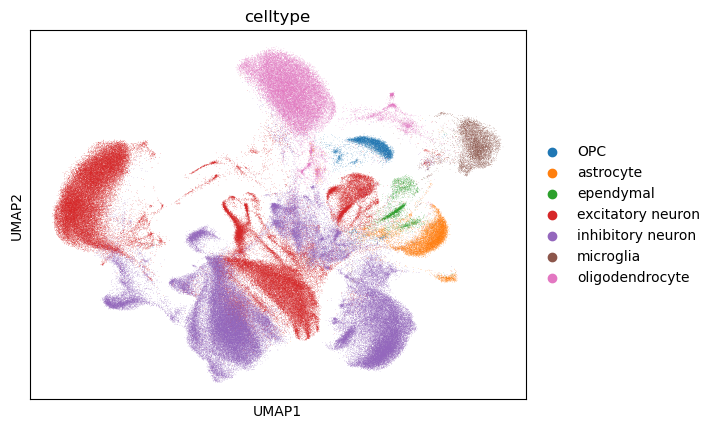

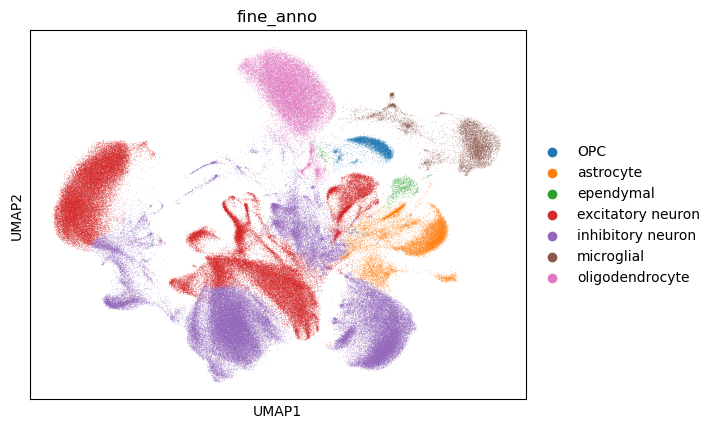

In [94]:
sc.pl.umap(adata, color = ['celltype'], save = 'gadata_rna_anno.pdf')
sc.pl.umap(adata, color = ['fine_anno'], save = 'gadata_ga_anno.pdf')

### Comparison

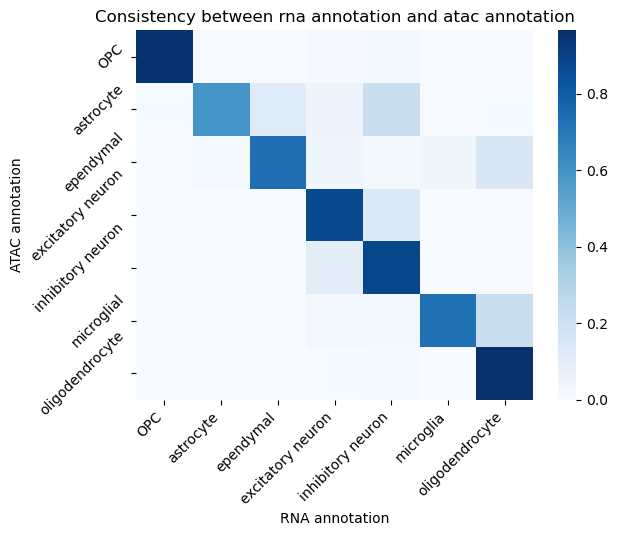

In [100]:
df_count = pd.crosstab(adata.obs.fine_anno, adata.obs.celltype)
import seaborn as sns 
sns.heatmap(df_count.div(df_count.sum(axis=1), axis=0), cmap = 'Blues')
plt.title('Consistency between rna annotation and atac annotation')
plt.xlabel('RNA annotation')
plt.ylabel('ATAC annotation')
# 设置 x 轴标签旋转 45 度
plt.xticks(rotation=45, ha="right")

# 如果也需要对 y 轴标签进行旋转，可以使用以下命令
plt.yticks(rotation=45)
plt.savefig('figures/anno_consistency.pdf')
plt.show()

In [74]:
df_count.sum(1)

ga_celltype
OPC                    5318
astrocyte             17292
ependymal              1277
excitatory neuron     94896
inhibitory neuron    103228
microglial             9176
oligodendrocyte       28381
dtype: int64

In [75]:
df_count.div(df_count.sum(axis=1), axis=0)

celltype,OPC,astrocyte,ependymal,excitatory neuron,inhibitory neuron,microglia,oligodendrocyte
ga_celltype,,,,,,,
OPC,0.956187,0.004137,0.000000,0.013351,0.023317,0.000940,0.002068
astrocyte,0.008964,0.590620,0.117337,0.050139,0.220275,0.004164,0.008501
ependymal,0.000783,0.018794,0.732185,0.034456,0.025059,0.039154,0.149569
excitatory neuron,0.000411,0.000453,0.000337,0.872397,0.124726,0.001412,0.000263
inhibitory neuron,0.000736,0.000329,0.000136,0.103547,0.886106,0.003284,0.005861
microglial,0.002724,0.002398,0.000654,0.027572,0.021905,0.722537,0.222210
oligodendrocyte,0.002185,0.005955,0.000070,0.009866,0.015398,0.000106,0.966421


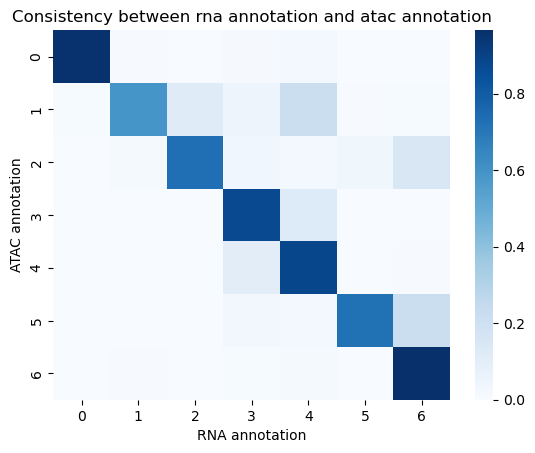

In [77]:
import seaborn as sns 
sns.heatmap(df_count.div(df_count.sum(axis=1), axis=0).values, cmap = 'Blues')
plt.title('Consistency between rna annotation and atac annotation')
plt.xlabel('RNA annotation')
plt.ylabel('ATAC annotation')
plt.show()

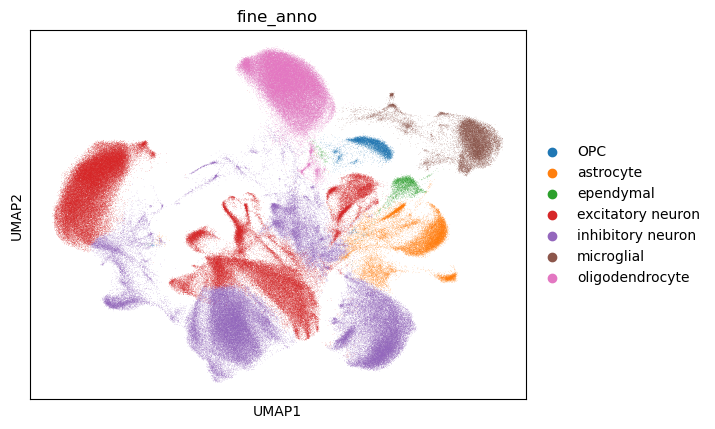

In [101]:
sc.pl.umap(scdata, color = ['fine_anno'], save = 'gadata_cell_anno.pdf')

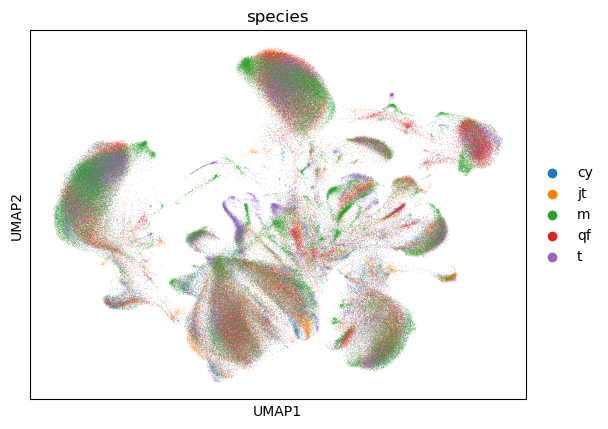

In [102]:
sc.pl.umap(scdata, color = ['species'], save = 'gadata_species.pdf')

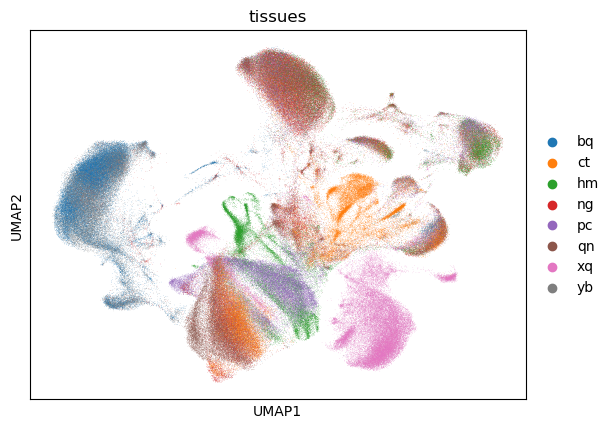

In [103]:

sc.pl.umap(scdata, color = ['tissues'], save = 'gadata_tissues.pdf')

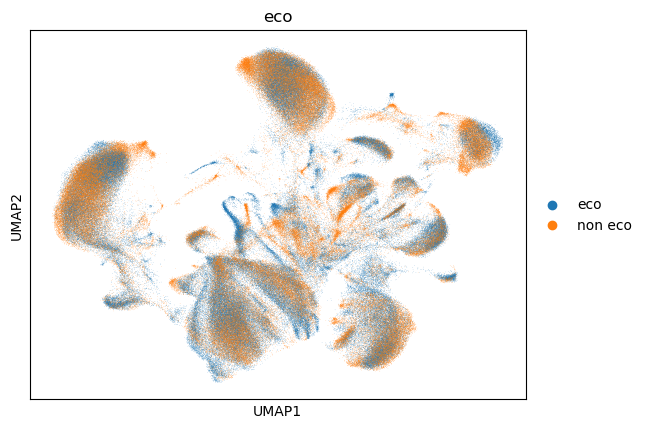

In [104]:
eco_dic = {'m': 'non eco',
           'cy': 'eco',
           'jt': 'eco',
           'qf': 'non eco',
           't': 'eco'}

scdata.obs.loc[:,'eco'] = scdata.obs.species.map(eco_dic)
sc.pl.umap(scdata, color = ['eco'], save = 'gadata_eco.pdf')